# Image Classification dengan MNIST Dataset


## The Problem: Image Classification

Dalam traditional programming, programmer mampu untuk mengartikulasikan aturan-aturan dan kondisi di dalam kodenya yang dapat digunakan program untuk *act in the correct way* untuk menyelesaikan suatu tugas.

Image classification merupakan permasalahan dimana program diminta untuk secara tepat mengklasifikasikan sebuah citra kedalam kelas yang tepat. Dalam kasus ini, programmer hampir mustahil untuk menentukan aturan-aturan dan kondisi untuk dapat secara tepat melakukan klasifikasi variasi citra yang tinggi, terutama untuk citra yang belum pernah dilihat sebelumnya.


## The Solution: Deep Learning

Deep Learning (DL) sangat baik dalam pengenalan pola (pattern recognition) melalui trial and error. Dengan melakukan training pada deep learning dengan data yang cukup (cukup banyak dan cukup bervariasi), serta menyediakan feedback kepada model DL mengenai performanya selama training, model DL dapat mengidentifikasi sekumpulan aturan dan kondisi untuk act in the correct way, meskipun hal ini memerlukan iterasi yang banyak.

## MNIST Dataset

Dataset yang berisi 70,000 citra hitam putih tulisan tangan angka dari 0 sampai 9. Kemampuan deep learning untuk secara akurat melakukan image classification pada MNIST dataset merupakan salah satu momen yang bersejarah. Pada saat ini, melakukan image classification pada MNIST menjadi semacam "hello world" untuk deeep learning

## Training and Validation Data and Labels

Ketika bekerja dengan citra untuk deep learning, diperlukan citra (dilambangkan dengan **x**), dan correct label (dilambangkan dengan **y**). Kemudian dataset (sekumpulan examples pair of x and y) dibagi kedalam data untuk training dan data untuk validation. Data validation digunakan untuk mengevaluasi performa dari model setelah ditrain pada data training

## Objectives



*   Menggunakan Keras API untuk load MNIST dataset dan mempersiapkan dataset untuk melakukan training
*   Membuat simpel neural network untuk melakukan image classification
*   Train neural network
*   Mengamati performa dari neural network yang sudah ditrain






## 1. Data Preparation

Pada lab ini akan digunakan framework Tensorflow 2, spesifiknya dengan Keras API. Keras mempunyai banyak built in function yang dirancang untuk computer vision tasks. Keras juga mmeiliki banyak helper method untuk banyak dataset umum, seperti MNIST.

Pertama, import modul keras dataset untuk MNIST

In [ ]:
from tensorflow.keras.datasets import mnist

Dengan modul **mnist**, kita dapat dengan mudah load MNIST data yang sudah dipartisi kedalam citra dan label untuk training set dan validation set.

In [ ]:
# split data kedalam train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Setelah data diload, kita dapat mengeksplorasi dataset untuk melihat ukuran dari dataset. Cell code dibawah digunakan untuk melihat ukuran/dimensi dari x_train dan x_valid. Dari 70,000 examples, displit menjadi 60,000 untuk data training dan 10000 untuk data validaton. Ukuran dari citra 28x28 pixel (2D array).

In [ ]:
print("dimensi x_train:", x_train.shape)
print("dimensi x_valid:", x_valid.shape)

dimensi x_train: (60000, 28, 28)
dimensi x_valid: (10000, 28, 28)


citra 28x28 pixel direpresentasikan dengan kumpulan unsigned 8-bit integer dengan nilai antara 0 dan 255. nilai pixel 0 merepresentasikan warna hitam, sedangkan nilai 255 merepresentasikan warna putih

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train.min()

0

In [ ]:
x_train.max()

255

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train[0].shape

(28, 28)

Terlihat bahwa baris pertama dari x_train berupa 2d array dengan ukuran (28 baris/heigh, 28 kolom/width). Array 2d tersebut bisa kita render menggunakan matplotlib sebagai citra hitam putih

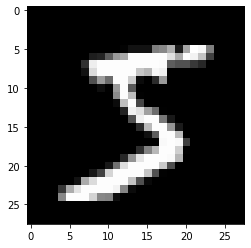

In [ ]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

Karena citra tidak cukup jelas apakah angka 5 atau 3, kita dapat melihat jawabannya (correct label) pada pasangan y_train untuk data tersebut

In [ ]:
y_train[0]

5

Dalam image classification problem, sebelum data digunakan untuk training perlu dilakukan persiapan terlebih dahulu dengan 3 tasks berikut:

1.   Flatten the image data
2.   Normalize the image data
3.   Categorize the labels





Flattening the image data berarti kita unroll 2d array (28, 28) kedalam single array berisi 784 pixel

In [ ]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [ ]:
# memastikan image data telah direshape
# x_train sekarang berisi 60000 citra dimana setiap citra berupa 1d array 784 pixel

x_train.shape

(60000, 784)

Model Deep Learning lebih baik untuk bekerja dengan floating point numbers antara 0 dan 1. Normalization yaitu mengonversi image data (nilainya 0-255) kedalam floating point yang nilanya antara 0 dan 1. Pendekatan paling sederhana untuk melakukan ini yaitu kita bagi semua nilai pixel dengan 255 (range max-min = 255-0)

In [ ]:
x_train = x_train / 255
x_valid = x_valid / 255

In [ ]:
x_train.dtype

dtype('float64')

In [ ]:
x_train.min()

0.0

In [ ]:
x_train.max()

1.0

Nilai dari label merupakan nilai dari 0 hingga 9. Kita perlu mengubah nilai ini menjadi categorical. Salah satu pendekatan yaitu one-hot encoding dimana nilai label berupa array berisi sejumlah kelas, dalam hal ini array 10 elemen. Kemudian untuk nilai label tertentu (misal 5), kita set nilai 1 untuk indeks ke 5 sedankgan nilai untuk yang lain kita set dengan nilai 0. Sehingga dari nilai label 5 diubah menjadi [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]

In [ ]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [ ]:
y_train[:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## 2. Creating the Model

Setelah data sudah dipersipkan, selanjutnya perlu membuat model yang akan ditrain menggunakan data tersebut. Untuk kali ini, model yang dibuat merupakan model simpel dengan beberapa layer. Model akan terdiri dari 3 bagaian utama:


1.   An Input layer, untuk menerima data dalam expected format
2.   Hidden layers, setiap layer tediri dari neuron-neuron. Setiap neuron punya pengaruh dalam prediksi model dengan weight-nya. Weight ini akan diupdate selama training untuk meningkatkan performa model dari feedback yang diberikan
3.   An Output layer, memberikan nilai untuk prediksi model untuk citra yang diberikan




Untuk memulai, digunakan keras sequantial model untuk membuat instance model.

In [ ]:
from tensorflow.keras.models import Sequential

# membuat instance
model = Sequential()

Setelah itu, kita perlu menambahkan input layer. Layer ini bersifat densely connected, yang berarti setiap neuron dan weight nya akan mempengaruhi setiap neuron di layer berikutnya.

In [ ]:
from tensorflow.keras.layers import Dense

Argument:
*   units merupakan jumlah neuron
*   activation: jenis activation function yang digunakan. Kita menggunakan relu sebagai nonlinearity function
*   input_shape: shape dari data yang akan masuk, disini berupa 1d array dengan 784 element




In [ ]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

Selanjutnya perlu menambahkan hidden layer yang juga bersifat densely connected.

In [ ]:
model.add(Dense(units=512, activation='relu'))

Selanjutnya menambahkan layer terakhir yaitu output layer. Layer ini menggunakan activation function softmax yang akan menghasilkan probabilitas antara 0 dan 1 untuk setiap unit.

In [ ]:
model.add(Dense(units = 10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Sebelum melakukan training, model perlu dicompile untuk menspesifikasikan jenis loss dan metrics performa yang digunakan. Digunakan categorical_crossentropy karena permasalahan kita merupakan multiclass classification. Metrics yang digunakan yaitu akurasi

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

Training model dengan data seringkali disebut juga fitting sebuah model ke data. Ketika training, nilai dari weights akan disesuaikan supaya mendaptkan loss yang minimum

Untuk training dapat menggunakan Keras model fit memthod. Method ini expect arguments berikut:


*   Data training
*   Label untuk data training

*   Epoch (berapa kali harus ditrain pada keseluruhan training dataset)
*   Validation/test data, beserta labelnya





In [ ]:
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1894 - accuracy: 0.9442 - val_loss: 0.1102 - val_accuracy: 0.9694
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0972 - accuracy: 0.9743 - val_loss: 0.1284 - val_accuracy: 0.9723
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0824 - accuracy: 0.9799 - val_loss: 0.1254 - val_accuracy: 0.9701
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0730 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0611 - accuracy: 0.9861 - val_loss: 0.1323 - val_accuracy: 0.9795


Setelah model ditrain, terlihat bahwa kedua akurasi pada training data dan akurasi pada validation data sangat tinggi dan tidak memiliki gap yang jauh. Model tergolong "good fit" sehingga dapat digunakan untuk mengklasifikasikan handwritten images secara akurat.

Pada lab selanjutnya, model ini akan digunakan untuk melakukan klasifikasi pada handwritten images yang belum pernah dilihat sebelumnya. Proses ini disebut inference